In [1]:
from google.colab import files
uploaded = files.upload()

Saving 연도별 친환경자동차 등록현황.csv to 연도별 친환경자동차 등록현황.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 연료종류별 자동차 등록현황.csv to 연료종류별 자동차 등록현황.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving 지역별 주유소 현황.csv to 지역별 주유소 현황.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import plotly.graph_objects as go

from datetime import datetime
from plotnine import *
from pandas.tseries.offsets import YearEnd
from sklearn.linear_model import LinearRegression

In [23]:
# 한글 폰트 깨짐 현상 해결 (실행 후 > 런타임 > 런타임 다시 시작 > 그래도 안되면 다시 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family = 'NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
############ 옵션 parameter ############
# 예측할 년도 범위
start_year = 2025 # start_year ~ end_year의 데이터 예측 (이상, 이하)
end_year = 2050 # start_year ~ end_year의 데이터 예측 (이상, 이하)
gap_year = 5 # 연 간격

# 주유소 수용률 계산용
gas_gun = 8 # 주유소당 평균 주유기 개수
elec_time = 200 # 한 대의 전기차가 충전을 위해 머무는 시간 (분)
gas_time = 5 # 한 대의 전기차가 충전을 위해 머무는 시간 (분)
#######################################

# CSV 읽기

In [4]:
eco_df = pd.read_csv('연도별 친환경자동차 등록현황.csv', encoding = 'cp949', index_col = 0, header = None, thousands = ',').T
car_df = pd.read_csv('연료종류별 자동차 등록현황.csv', encoding = 'cp949', index_col = 0, header = None, thousands = ',').T
gas_station_df = pd.read_csv('지역별 주유소 현황.csv', encoding = 'cp949', index_col = 0, header = None, thousands = ',').T

year_range = range(start_year, end_year+1, gap_year)
X_predict = pd.DataFrame(data = [datetime.toordinal(datetime(_,12,31)) for _ in year_range], columns = ['연도'])

# 데이터 시각화



In [5]:
eco_df.head(8)

,연도,친환경계,하이브리드차,전기차,수소차
1,2013,105044,103580,1464,0
2,2014,140297,137522,2775,0
3,2015,180361,174620,5712,29
4,2016,244158,233216,10855,87
5,2017,339134,313856,25108,170
6,2018,461733,405084,55756,893
7,2019,601048,506047,89918,5083
8,2020,820329,674461,134962,10906


<Figure size 432x288 with 0 Axes>

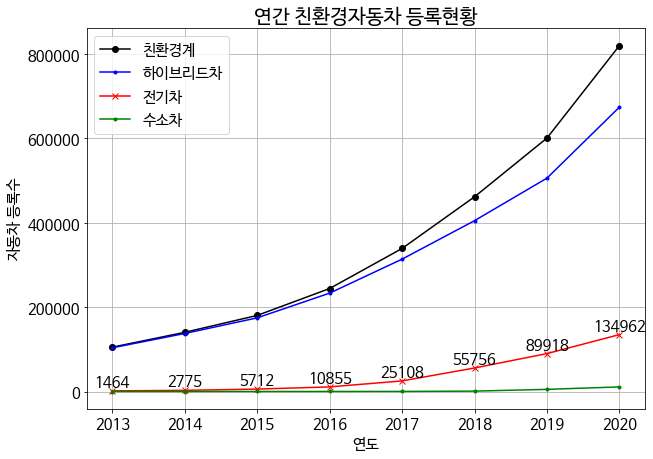

In [6]:
fig = plt.figure()
plt.figure(figsize = (10, 7)) # 그래프 크기
plt.rc('font', size = 15) # 폰트 크기
titleFont = {'fontsize': 20, 'color': '#000000'} # 제목 폰트 설정

# x축 연도 : y축 친환경자동차 등록현황
plt.plot(eco_df['연도'], eco_df['친환경계'], color = 'black', marker = 'o', label = '친환경계', linestyle = 'solid')
plt.plot(eco_df['연도'], eco_df['하이브리드차'], color = 'blue', marker = '.', label = '하이브리드차' , linestyle = 'solid')
plt.plot(eco_df['연도'], eco_df['전기차'], color = 'red', marker = 'x', label = '전기차',linestyle = 'solid')
plt.plot(eco_df['연도'], eco_df['수소차'], color = 'green', marker = '.', label = '수소차', linestyle = 'solid')

# 제목
plt.title("연간 친환경자동차 등록현황", fontdict = titleFont)

# 범례, 그리드
plt.legend(loc='upper left')
plt.grid(True)

# x축 y축 레이블
plt.xlabel("연도")
plt.ylabel("자동차 등록수")

# 전기차 데이터 표시
for i in range(1, 9):
  plt.annotate(eco_df['전기차'][i], (2012 + i, eco_df['전기차'][i]), textcoords = "offset points", xytext = (0, 5), ha = 'center')

plt.show()

In [7]:
car_df.head(7)

,연도,차량계,휘발유,경유,LPG,하이브리드,CNG,전기,수소,기타
1,2014,20117955,9587351,7938627,2336656,137522,40457,2775,0,74567
2,2015,20989885,9808633,8622179,2257447,174620,39777,5712,29,81488
3,2016,21803351,10092399,9170456,2167094,233216,38880,10855,87,90364
4,2017,22528295,10369752,9576395,2104675,313856,38918,25108,170,99421
5,2018,23202555,10629296,9929537,2035403,405084,38934,55756,893,107652
6,2019,23677366,10960779,9957543,2004730,506047,38147,89918,5083,115119
7,2020,24365979,11410484,9992124,1979407,674461,36940,134962,10906,126695


<Figure size 432x288 with 0 Axes>

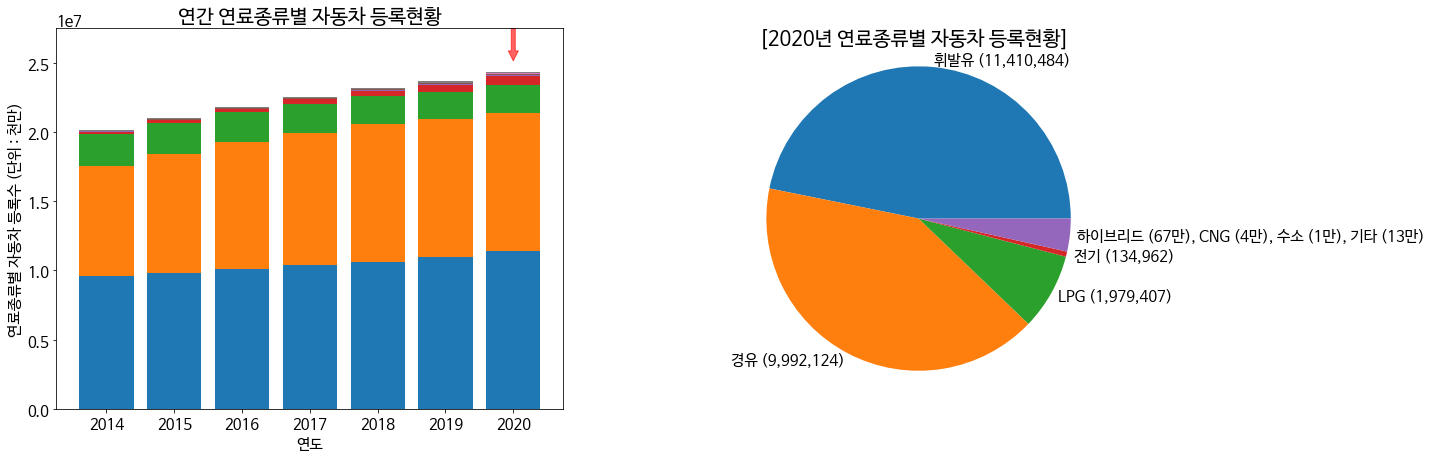

In [8]:
fig = plt.figure()
plt.figure(figsize = (20, 7)) # 그래프 크기
plt.rc('font', size = 15) # 폰트 크기

### 연도별 누적 합계 그래프 ###
x1 = car_df['휘발유']
x2 = car_df['경유']
x3 = car_df['LPG']
x4 = car_df['하이브리드']
x5 = car_df['CNG']
x6 = car_df['전기']
x7 = car_df['수소']
x8 = car_df['기타']

data = [x1, x2, x3, x4, x5, x6, x7, x8]
x_array = car_df['연도']

plt.subplot(1, 2, 1)  # 누적 합계 그래프 배치
for i in range(0, 8): # 누적 막대 데이터 8개
  plt.bar(
    x_array,          # 0부터 8까지의 X 위치에서
    data[i],          # 각 높이(8개)만큼 쌓음
    bottom = np.sum(data[:i], axis=0)
  )

# 제목
plt.title("연간 연료종류별 자동차 등록현황", fontdict = titleFont)

# x축 y축 레이블
plt.xlabel("연도")
plt.ylabel("연료종류별 자동차 등록수 (단위 : 천만)") #2.5 -> 2천 5백만
plt.ylim([0, 27500000]) #y축 공간 여백

# 화살표
arrow = patches.FancyArrowPatch(
    (2020, 28000000), # 화살표 X축
    (2020, 25000000), # 화살표 Y축
    mutation_scale = 20,
    color = 'red',
    fill = True,
    alpha = 100)
plt.gca().add_patch(arrow)


### 2020년 연료종류별 자동차 등록현황 원형 그래프 ###
names = ['휘발유 (11,410,484)', '경유 (9,992,124)', 'LPG (1,979,407)', '전기 (134,962)', '하이브리드 (67만), CNG (4만), 수소 (1만), 기타 (13만)']
values = [11410484, 9992124, 1979407, 134962, 674461 + 36940 + 10906 + 126695]

plt.subplot(1, 2, 2)  # 원형 그래프 배치

# 제목
plt.text(-1.05, 1.15, '[2020년 연료종류별 자동차 등록현황]', fontdict = titleFont)

# 레이블
plt.pie(values, labels=names, labeldistance = 1.05);

plt.show()

In [9]:
gas_station_df.head(6)

,연도,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도,주유소계
1,2017,708,2426,1166,1314,288,374,251,433,537,64,250,349,926,918,193,1055,755,12007
2,2018,681,2386,1150,1278,280,369,240,427,508,64,244,346,904,906,193,1034,740,11750
3,2019,674,2396,1135,1287,277,364,240,416,496,66,239,342,902,903,194,1033,736,11700
4,2020,675,2391,1117,1263,269,348,236,403,488,68,240,336,899,902,194,1026,734,11589
5,2021,659,2361,1090,1264,262,343,227,387,470,69,237,330,877,883,194,1008,717,11378
6,2022,642,2330,1071,1246,260,332,220,380,442,67,234,323,869,856,194,1002,713,11181


<Figure size 432x288 with 0 Axes>

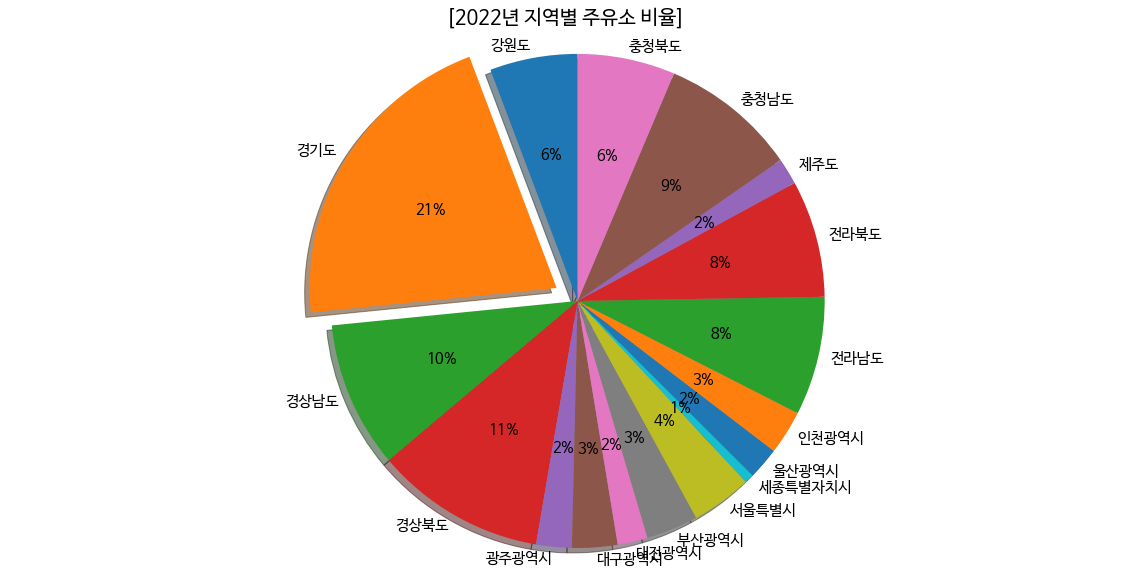

In [10]:
fig = plt.figure()
plt.figure(figsize = (20, 10)) # 그래프 크기
plt.rc('font', size = 15) # 폰트 크기

# 2022년 데이터 입력
labels = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시	', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도']
sizes = [642, 2330, 1071, 1246, 260, 332, 220, 380, 442, 67, 234, 323, 869, 856, 194, 1002, 713]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# 제목
plt.title("[2022년 지역별 주유소 비율]", fontdict = titleFont)

plt.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.0f%%',
        shadow = True,
        labeldistance = 1.05,
        startangle = 90)

plt.axis('equal') # 비율 반영
plt.show()

In [11]:
year_range

range(2025, 2051, 5)

In [12]:
X_predict

,연도
0,739616
1,741442
2,743268
3,745095
4,746921
5,748747


# 총 차량수 예측

In [13]:
# 연도를 학습에 맞게 ordinal로 변경(데이터 전처리)
car_df['연도'] = pd.to_datetime(car_df['연도'], format = '%Y') + YearEnd(0)
car_df['연도'] = car_df['연도'].apply(datetime.toordinal)

# 데이터셋
total_car_X = car_df[['연도']]
total_car_Y = car_df[['차량계']]

# 예측 모델
total_car_lr = LinearRegression()

# 예측 모델 학습
total_car_lr.fit(total_car_X, total_car_Y)

# 예측
total_car_Y_predict = total_car_lr.predict(X_predict).round()

# 0 미만은 0으로 변경
total_car_Y_predict[total_car_Y_predict < 0] = 0

# 총 전기차수, 친환경차량수 예측

In [14]:
# 연도를 학습에 맞게 ordinal로 변경
eco_df['연도'] = pd.to_datetime(eco_df['연도'], format = '%Y') + YearEnd(0)
eco_df['연도'] = eco_df['연도'].apply(datetime.toordinal)

# 데이터셋
eco_X = eco_df[['연도']]
elec_Y = eco_df[['전기차']]
eco_Y = eco_df[['친환경계']]

# 예측 모델
elec_lr = LinearRegression()
eco_lr = LinearRegression()

# 예측 모델 학습
elec_lr.fit(eco_X, elec_Y)
eco_lr.fit(eco_X, eco_Y)

# 예측
elec_Y_predict = elec_lr.predict(X_predict).round()
eco_Y_predict = elec_lr.predict(X_predict).round()

# 0 미만은 0으로 변경
elec_Y_predict[elec_Y_predict < 0] = 0
eco_Y_predict[eco_Y_predict < 0] = 0

# 총 주유소수 예측

In [15]:
# 연도를 학습에 맞게 ordinal로 변경
gas_station_df['연도'] = pd.to_datetime(gas_station_df['연도'], format = '%Y') + YearEnd(0)
gas_station_df['연도'] = gas_station_df['연도'].apply(datetime.toordinal)

# 데이터셋
gas_station_X = gas_station_df[['연도']]
gas_station_Y = gas_station_df[['주유소계']]

# 예측 모델
gas_station_lr = LinearRegression()

# 예측 모델 학습
gas_station_lr.fit(gas_station_X, gas_station_Y)

# 예측
gas_station_Y_predict = gas_station_lr.predict(X_predict).round()

# 0 미만은 0으로 변경
gas_station_Y_predict[gas_station_Y_predict < 0] = 0

# 주유소 평균 수용률 계산 (전국주유소개수 / 전국차량대수)

In [16]:
ratio_df = pd.merge(car_df, gas_station_df[['연도','주유소계']], on = '연도')
gas_car_list = ['휘발유', '경유', 'LPG', '하이브리드', 'CNG']
ratio_df['화석차계'] = ratio_df[gas_car_list].sum(axis=1)
ratio_df['수용률'] = ratio_df['주유소계'] / ratio_df['화석차계'] * gas_gun * elec_time / gas_time

mean_acc = ratio_df["수용률"].mean()

**[수용률 계산 데이터]**

ratio_df['주유소계'] : 
12007
11750
11700
11589

ratio_df['화석차계'] : 
22403596
23038254
23467246
24093416

gas_gun : 
8

elec_time : 
200

gas_time :
5

= **ratio_df['수용률'] :**
0.171501
0.163207
0.159542
0.153921

In [17]:
ratio_df

,연도,차량계,휘발유,경유,LPG,하이브리드,CNG,전기,수소,기타,주유소계,화석차계,수용률
0,736694,22528295,10369752,9576395,2104675,313856,38918,25108,170,99421,12007,22403596,0.171501
1,737059,23202555,10629296,9929537,2035403,405084,38934,55756,893,107652,11750,23038254,0.163207
2,737424,23677366,10960779,9957543,2004730,506047,38147,89918,5083,115119,11700,23467246,0.159542
3,737790,24365979,11410484,9992124,1979407,674461,36940,134962,10906,126695,11589,24093416,0.153921


# 예측 결과 출력

In [18]:
print(f'화석 차량 주유소 평균 수용률 : {mean_acc}')

y_predict_list = [
    ('총 차량 수', total_car_Y_predict.round()),
    ('친환경 자동차 수', eco_Y_predict.round()),
    ('전기 자동차 수', elec_Y_predict.round()),
    ('주유소 수', gas_station_Y_predict.round()),
    ('필요한 전기차 충전기 수', (eco_Y_predict * mean_acc).round())
]

for i, year in enumerate(year_range):
    print(f'\n- {year}년')
    for item in y_predict_list:
        print(f'{item[0]} : {int(item[1][i]):,}')

화석 차량 주유소 평균 수용률 : 0.16204256407658063

- 2025년
총 차량 수 : 27,960,043
친환경 자동차 수 : 196,109
전기 자동차 수 : 196,109
주유소 수 : 10,759
필요한 전기차 충전기 수 : 31,778

- 2030년
총 차량 수 : 31,444,657
친환경 자동차 수 : 287,439
전기 자동차 수 : 287,439
주유소 수 : 9,994
필요한 전기차 충전기 수 : 46,577

- 2035년
총 차량 수 : 34,929,270
친환경 자동차 수 : 378,770
전기 자동차 수 : 378,770
주유소 수 : 9,229
필요한 전기차 충전기 수 : 61,377

- 2040년
총 차량 수 : 38,415,791
친환경 자동차 수 : 470,151
전기 자동차 수 : 470,151
주유소 수 : 8,463
필요한 전기차 충전기 수 : 76,184

- 2045년
총 차량 수 : 41,900,404
친환경 자동차 수 : 561,482
전기 자동차 수 : 561,482
주유소 수 : 7,698
필요한 전기차 충전기 수 : 90,984

- 2050년
총 차량 수 : 45,385,017
친환경 자동차 수 : 652,812
전기 자동차 수 : 652,812
주유소 수 : 6,933
필요한 전기차 충전기 수 : 105,783


# 예측 결과 시각화

In [19]:
y_predict_df = pd.DataFrame({
    '연도': ['2025', '2030', '2035', '2040', '2045', '2050'],
    '총 차량 수': ['27,960,043', '31,444,657', '34,929,270', '38,415,791', '41,900,404', '45,385,017'],
    '친환경 자동차 수': ['196,109', '287,439', '378,770', '470,151', '561,482', '652,812'],
    '전기 자동차 수': ['196,109', '287,439', '378,770', '470,151', '561,482', '652,812'],
    '주유소 수': ['10,759', '9,994', '9,229', '8,463', '7,698', '6,933'],
    '필요한 전기차 충전기 수': ['31,778', '46,577', '61,377', '76,184', '90,984', '105,783'],
})
y_predict_df

,연도,총 차량 수,친환경 자동차 수,전기 자동차 수,주유소 수,필요한 전기차 충전기 수
0,2025,"27,960,043","196,109","196,109","10,759","31,778"
1,2030,"31,444,657","287,439","287,439","9,994","46,577"
2,2035,"34,929,270","378,770","378,770","9,229","61,377"
3,2040,"38,415,791","470,151","470,151","8,463","76,184"
4,2045,"41,900,404","561,482","561,482","7,698","90,984"
5,2050,"45,385,017","652,812","652,812","6,933","105,783"


<Figure size 432x288 with 0 Axes>

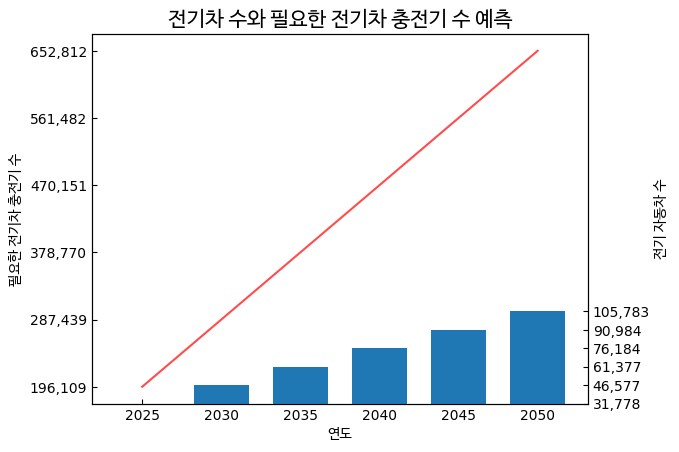

In [20]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (20, 7) # 그래프 크기
plt.rcParams['font.size'] = 15 # 폰트 크기

# 스타일 설정
plt.style.use('default')

# 데이터 준비
x = y_predict_df['연도']
y1 = y_predict_df['전기 자동차 수']
y2 = y_predict_df['필요한 전기차 충전기 수']

# 그래프 그리기
fig, ax1 = plt.subplots()

# 제목
plt.title("전기차 수와 필요한 전기차 충전기 수 예측", fontsize = 15, family = 'NanumBarunGothic')

# 필요한 전기차 충전기 수 그래프
ax1.plot(x, y1, color = 'red', alpha=0.7)
ax1.set_xlabel('연도', family = 'NanumBarunGothic')
ax1.set_ylabel('필요한 전기차 충전기 수', family = 'NanumBarunGothic')
ax1.tick_params(axis = 'both', direction='in')

# 전기 자동차 수 그래프
ax2 = ax1.twinx()
ax2.bar(x, y2, width = 0.7)
ax2.set_ylabel('전기 자동차 수', family = 'NanumBarunGothic')
ax2.tick_params(axis = 'y', direction = 'in')
ax2.set_ylim(0, 20)

plt.show()

<Figure size 640x480 with 0 Axes>

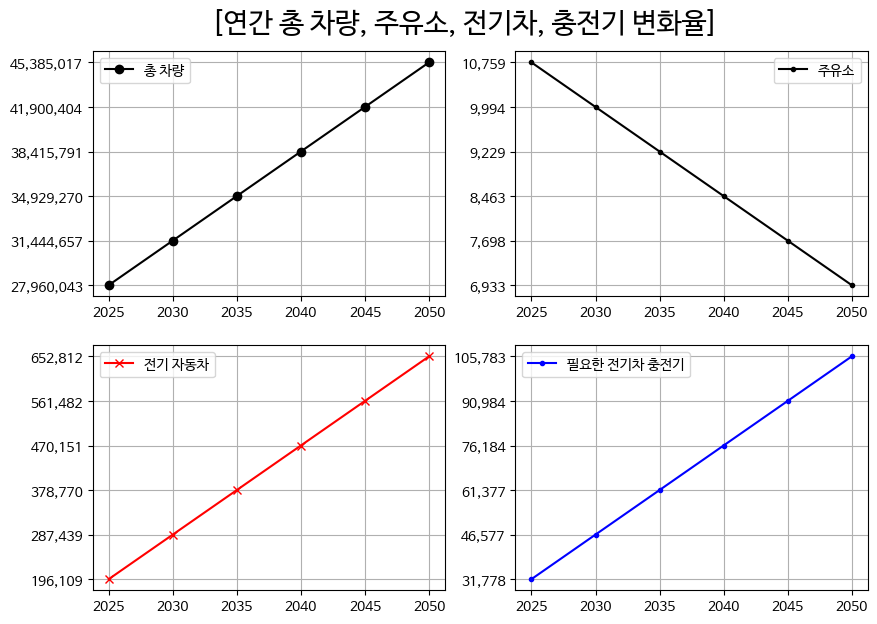

In [24]:
fig = plt.figure()
plt.figure(figsize = (10, 7)) # 그래프 크기
plt.rc('font', size = 10) # 폰트 크기

plt.subplot(2, 2, 1) 
plt.plot(y_predict_df['연도'], y_predict_df['총 차량 수'], color = 'black', marker = 'o', label = '총 차량', linestyle = 'solid')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.ylim(5.25, -0.25)
plt.plot(y_predict_df['연도'], y_predict_df['주유소 수'], color = 'black', marker = '.', label = '주유소', linestyle = 'solid')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(y_predict_df['연도'], y_predict_df['전기 자동차 수'], color = 'red', marker = 'x', label = '전기 자동차', linestyle = 'solid')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(y_predict_df['연도'], y_predict_df['필요한 전기차 충전기 수'], color = 'blue', marker = '.', label = '필요한 전기차 충전기', linestyle = 'solid')
plt.legend(loc='upper left')
plt.grid(True)

# 제목
plt.text(-5, 12.3, '[연간 총 차량, 주유소, 전기차, 충전기 변화율]', fontdict = titleFont)

plt.show()

# 예측 결과 데이터 내보내기

In [25]:
y_predict_df.to_csv('2025년 2050년 5년 단위 예측 결과.csv',encoding="cp949", index = False) # 경로를 지정해서 파일을 저장해준다
!ls # 저장 확인

'2025년 2050년 5년 단위 예측 결과.csv'	'연료종류별 자동차 등록현황.csv'
'지역별 주유소 현황.csv'		 sample_data
'연도별 친환경자동차 등록현황.csv'


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2025년 2050년 5년 단위 예측 결과 행렬전환.csv to 2025년 2050년 5년 단위 예측 결과 행렬전환.csv


In [ ]:
import io
predict_df = pd.read_csv(io.StringIO(uploaded['2025년 2050년 5년 단위 예측 결과 행렬전환.csv'].decode('cp949')), index_col = 0, header = None, thousands = ',').T

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

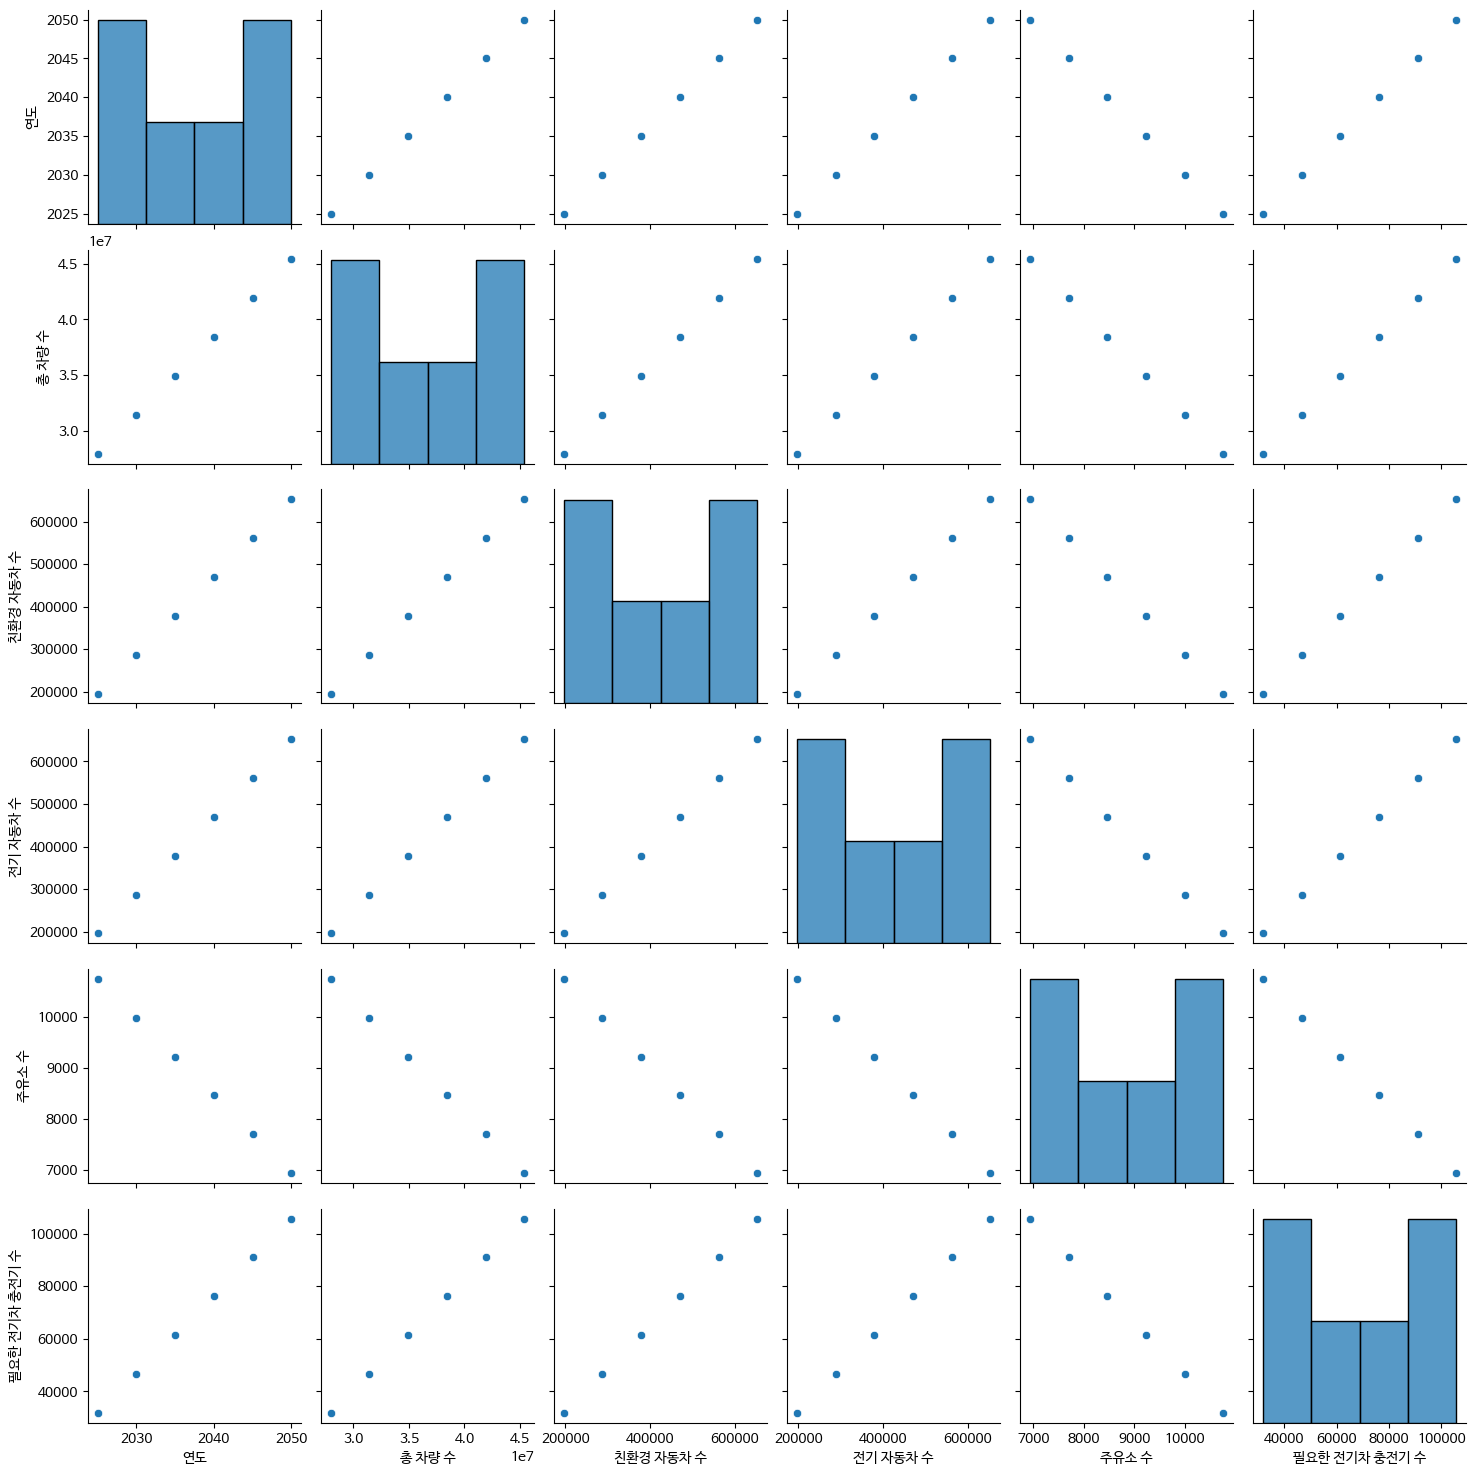

In [ ]:
fig = plt.figure()
plt.figure(figsize = (5, 3)) # 그래프 크기
plt.rc('font', size = 10) # 폰트 크기

sns.pairplot(predict_df[["연도", "총 차량 수", "친환경 자동차 수", "전기 자동차 수", "주유소 수", "필요한 전기차 충전기 수"]])
plt.show()